In [1]:
%cd ..
from src.models.cell_models import ReparametrizedFitzHughNagumo
from src.models.dynamics_models import BidomainModel
import src.utils as utils
import numpy as np
import ufl

/home/drvinko/Desktop/Modeliranje-biofizike-srcanog-tkiva


# Testing the model on a 1x1 rectangular grid

In [2]:
domain = utils.create_square(32, 32)
x = ufl.SpatialCoordinate(domain)
cell_model = ReparametrizedFitzHughNagumo()


class Model(BidomainModel):
    def __init__(
        self,
    ):
        pass

    def initial_V_m(self):
        return lambda x: x[0] ** 2 + x[1] ** 2 < 0.2**2, 0.0

    def ischemia(self):
        return (
            lambda x: (x[0] - 0.5) ** 2 + (x[1] - 0.5) ** 2 < 0.5**2,
            model.M_i / 10,
            model.M_e / 10,
        )


model = Model()
model.setup(domain)

In [3]:
model.plot_initial_V_m()

Widget(value='<iframe src="http://localhost:45619/index.html?ui=P_0x7f424c3a8610_0&reconnect=auto" class="pyvi…

In [4]:
model.plot_ischemia()

Widget(value='<iframe src="http://localhost:45619/index.html?ui=P_0x7f424c3ab750_1&reconnect=auto" class="pyvi…

In [5]:
model.solve(
    T=50,
    steps=50,
    cell_model=cell_model,
    gif_name="2D_rectangle.gif",
    signal_point=[0.2, 0.2, 0.0],
)

Solving problem: 100%|██████████| 50/50 [00:05<00:00,  8.82it/s]


### Plotting a transmembrane potential in a given signal point

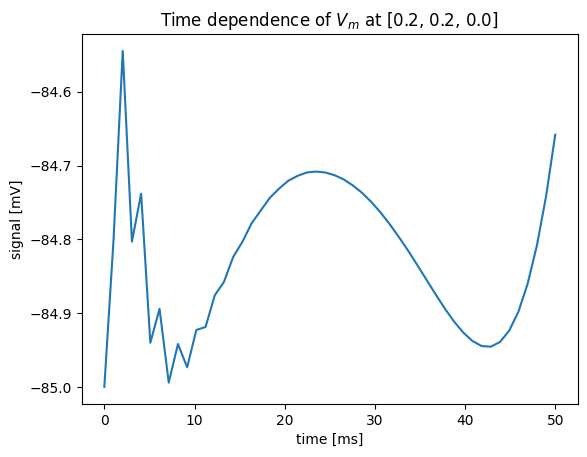

In [6]:
model.plot_signal()